## Intro to Plots
In this demonstration, we will begin working with and looking at data.
After we have a good understanding of where our data comes from, the biases in our data set, and what our data represent, we can then start to look at the patterns present in the data.

In [1]:
from matplotlib import pyplot
import json
from datetime import datetime
import seaborn

In [2]:
with open(r'D:\EMAT_22110\FB Data Silva\facebook-davidsilva100046_toshare\ads_and_businesses\advertisers_who_uploaded_a_contact_list_with_your_information.json') as cl:
    contactlists = json.load(cl)

with open(r'D:\EMAT_22110\FB Data Silva\facebook-davidsilva100046_toshare\posts\your_posts_1.json') as p:
    posts = json.load(p)

Now that the data is loaded in, let's take a look to make sure we have what we expect using the `type()` function.

In [3]:
type(contactlists)

dict

In [4]:
contactlists.keys()

dict_keys(['custom_audiences'])

In [5]:
len(contactlists['custom_audiences'])

2970

In [6]:
namelengths = [len(x) for x in contactlists['custom_audiences']]
namelengths[:10]

[17, 14, 15, 9, 14, 10, 19, 17, 8, 13]

Although it may be a bit arbitrary, we now have some numbers to work with.
Possible questions that this data would help answer:
1. What is a good length for a Facebook business page name?
1. What is the longest name for a Facebook business page in this dataset?
1. What is the shortest name for a Facebook business page in this dataset?
1. *What is the distribution of name lengths for Facebook business pages?*

(array([242., 779., 728., 504., 324., 176.,  94.,  63.,  40.,  20.]),
 array([ 3. , 10.2, 17.4, 24.6, 31.8, 39. , 46.2, 53.4, 60.6, 67.8, 75. ]),
 <BarContainer object of 10 artists>)

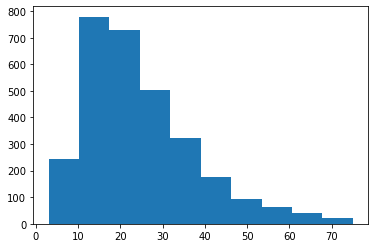

In [7]:
pyplot.hist(namelengths)

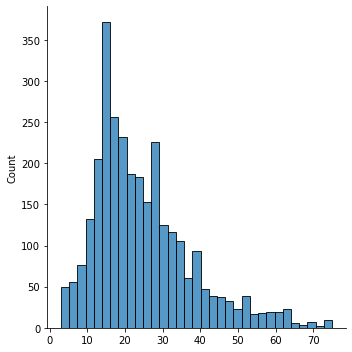

In [8]:
seaborn.displot(namelengths)

Enough of the arbitrary business names lengths.
We also have some information about the posts our account has made on Facebook.
*What questions could we ask of this dataset?*

First, let's look at the data we are working with.

In [9]:
type(posts)

list

In [10]:
posts[:10]

[{'timestamp': 1562008506,
  'attachments': [{'data': [{'media': {'uri': 'photos_and_videos/TimelinePhotos_TaimeUdi3Q/65425624_10218800709066141_8812704912031875072_o_10218800709026140.jpg',
       'creation_timestamp': 1562008366,
       'media_metadata': {'photo_metadata': {'camera_make': 'Google',
         'camera_model': 'Pixel 3',
         'taken_timestamp': 1561983686,
         'modified_timestamp': 1562008100,
         'exposure': '33363/1000000',
         'focal_length': '4440/1000',
         'f_stop': '180/100',
         'iso_speed': 73,
         'latitude': 41.148383333333,
         'longitude': -81.346986111111,
         'orientation': 1,
         'original_width': 2849,
         'upload_ip': '131.123.49.82'}},
       'title': 'Timeline Photos',
       'description': 'This is just too surreal, exciting, mind boggling, crazy. 201J Taylor Hall at Kent State.'}}]}],
  'data': [{'post': 'This is just too surreal, exciting, mind boggling, crazy. 201J Taylor Hall at Kent State.'}]

In [11]:
type(posts[0])

dict

In [12]:
posts[0].keys()

dict_keys(['timestamp', 'attachments', 'data'])

In [13]:
len(posts)

536

There is a key called timestamp, let's look into that a bit more.

In [14]:
posts[0]['timestamp']

1562008506

In [15]:
a_date = datetime.utcfromtimestamp(posts[0]['timestamp'])
a_date

datetime.datetime(2019, 7, 1, 19, 15, 6)

In [16]:
a_date.month, a_date.day, a_date.year

(7, 1, 2019)

In [17]:
post_dates = [datetime.utcfromtimestamp(x['timestamp']) for x in posts]
post_dates[:10]

[datetime.datetime(2019, 7, 1, 19, 15, 6),
 datetime.datetime(2019, 6, 11, 0, 44, 8),
 datetime.datetime(2019, 6, 10, 23, 45),
 datetime.datetime(2019, 6, 10, 20, 28, 52),
 datetime.datetime(2019, 6, 10, 20, 8, 1),
 datetime.datetime(2019, 6, 6, 18, 42, 58),
 datetime.datetime(2019, 6, 5, 23, 12, 49),
 datetime.datetime(2019, 6, 4, 21, 29, 55),
 datetime.datetime(2019, 3, 11, 5, 21, 9),
 datetime.datetime(2019, 3, 1, 18, 32, 25)]

In [18]:
post_years = [x.year for x in post_dates]
post_years[:10]

[2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019]

(array([258.,  58.,  52.,  16.,  61.,  30.,   3.,   9.,  26.,  23.]),
 array([2008. , 2009.1, 2010.2, 2011.3, 2012.4, 2013.5, 2014.6, 2015.7,
        2016.8, 2017.9, 2019. ]),
 <BarContainer object of 10 artists>)

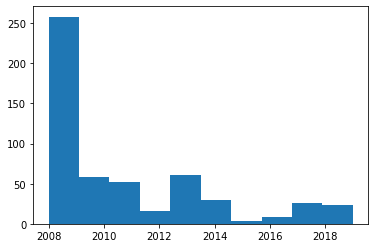

In [19]:
pyplot.hist(post_years)

Hold up, does this make any sense? We are treating time series as just a set of categories. We can do better than this.

In [20]:
import pandas as pd

In [21]:
posts_df = pd.DataFrame(posts)
posts_df

,timestamp,attachments,data,title,tags
0,1562008506,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'This is just too surreal, exciting,...",NaN,NaN
1,1560213848,NaN,[{'post': 'The reading is done! Only took 3 ho...,David Silva updated his status.,NaN
2,1560210300,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'BACK AND READY TO FINISH THIS! Resu...,David Silva was live.,NaN
3,1560198532,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'Reading my dissertation live, no id...",David Silva was live.,NaN
4,1560197281,NaN,[{'post': 'Update: 3:42pm: After 2 hours and 1...,David Silva updated his status.,NaN
...,...,...,...,...,...
531,1213050248,NaN,[{'post': 'is going to MEXICO in 3 days!'}],David Silva updated his status.,NaN
532,1212206744,NaN,[{'post': 'has to work tomorow :('}],David Silva updated his status.,NaN
533,1212127875,NaN,[{'post': 'just got back from climbing! it was...,David Silva updated his status.,NaN
534,1212037617,NaN,[{'post': 'is your leader... do as he says'}],David Silva updated his status.,NaN


In [22]:
posts_df['timestamp'] = [datetime.utcfromtimestamp(x) for x in posts_df['timestamp']]
posts_df

,timestamp,attachments,data,title,tags
0,2019-07-01 19:15:06,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'This is just too surreal, exciting,...",NaN,NaN
1,2019-06-11 00:44:08,NaN,[{'post': 'The reading is done! Only took 3 ho...,David Silva updated his status.,NaN
2,2019-06-10 23:45:00,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'BACK AND READY TO FINISH THIS! Resu...,David Silva was live.,NaN
3,2019-06-10 20:28:52,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'Reading my dissertation live, no id...",David Silva was live.,NaN
4,2019-06-10 20:08:01,NaN,[{'post': 'Update: 3:42pm: After 2 hours and 1...,David Silva updated his status.,NaN
...,...,...,...,...,...
531,2008-06-09 22:24:08,NaN,[{'post': 'is going to MEXICO in 3 days!'}],David Silva updated his status.,NaN
532,2008-05-31 04:05:44,NaN,[{'post': 'has to work tomorow :('}],David Silva updated his status.,NaN
533,2008-05-30 06:11:15,NaN,[{'post': 'just got back from climbing! it was...,David Silva updated his status.,NaN
534,2008-05-29 05:06:57,NaN,[{'post': 'is your leader... do as he says'}],David Silva updated his status.,NaN


In [23]:
posts_df['years'] = [x.year for x in posts_df['timestamp']]
posts_df

,timestamp,attachments,data,title,tags,years
0,2019-07-01 19:15:06,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'This is just too surreal, exciting,...",NaN,NaN,2019
1,2019-06-11 00:44:08,NaN,[{'post': 'The reading is done! Only took 3 ho...,David Silva updated his status.,NaN,2019
2,2019-06-10 23:45:00,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'BACK AND READY TO FINISH THIS! Resu...,David Silva was live.,NaN,2019
3,2019-06-10 20:28:52,[{'data': [{'media': {'uri': 'photos_and_video...,"[{'post': 'Reading my dissertation live, no id...",David Silva was live.,NaN,2019
4,2019-06-10 20:08:01,NaN,[{'post': 'Update: 3:42pm: After 2 hours and 1...,David Silva updated his status.,NaN,2019
...,...,...,...,...,...,...
531,2008-06-09 22:24:08,NaN,[{'post': 'is going to MEXICO in 3 days!'}],David Silva updated his status.,NaN,2008
532,2008-05-31 04:05:44,NaN,[{'post': 'has to work tomorow :('}],David Silva updated his status.,NaN,2008
533,2008-05-30 06:11:15,NaN,[{'post': 'just got back from climbing! it was...,David Silva updated his status.,NaN,2008
534,2008-05-29 05:06:57,NaN,[{'post': 'is your leader... do as he says'}],David Silva updated his status.,NaN,2008


In [24]:
groups_df = posts_df.groupby('years').count()
groups_df

,timestamp,attachments,data,title,tags
years,,,,,
2008,76,32,44,76,28
2009,182,21,163,178,1
2010,58,1,58,57,0
2011,52,4,51,49,0
2012,16,8,10,8,4
2013,61,38,49,26,9
2014,30,18,23,12,8
2015,3,2,3,2,1
2016,9,2,9,9,0


In [25]:
years = range(2008,2020)

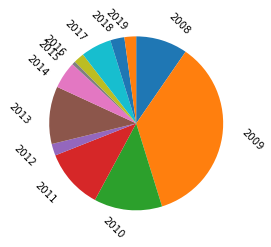

In [26]:
pieplot = pyplot.pie(x = groups_df['data'], labels = years, startangle = 90, counterclock = False, labeldistance = 1.2, textprops = {'rotation': -45})

Without any statistical analysis, what observations can we make about the number of posts made to Facebook over the years?